# Modeling Stochastic Gradient Descent with SDEs

In [47]:
import numpy as np
import matplotlib.pyplot as plt

## (Q7) GD - SGD and SDE EM

In [105]:
n = 2; p = 2; x_0 = np.zeros(2)
np.random.seed(42)
M = np.random.normal(0,1,size=(2,2))
y = np.random.normal(0,1,size=n)
T = 50 ; h = 2.0**(-np.arange(1,5))
K = np.floor(T/h).astype(int)

### Gradient Descent
$x^{k+1} = x^k - h \nabla f(x^k)$ where $f(x) = \frac{1}{2n}\|Mx-y\|^2$, 

which lands $\nabla f(x) = \frac{1}{n}M^\top\|Mx-y\|$

In [108]:
f = lambda M,x,y : 0.5*np.linalg.norm(M@x-y)**2/len(y)
grad_f = lambda M,x,y : M.T@(M@x-y)/len(y)

def gd(grad_f,f,h,K,M,y,x_0):
    x_gd = np.zeros((K,2))
    x_gd[0] = x_0
    f_gd = np.zeros(K)
    f_gd[0] = f(M,x_0,y)
    for t in range(1,K):
        x_gd[t,:] = x_gd[t-1,:] - h*grad_f(M,x_gd[t-1,:],y)
        f_gd[t] = f(M,x_gd[t,:],y)
    return [x_gd,f_gd]

def sgd(grad_f,f,h,K,M,y,x_0): # TO BE DONE
    x_gd = np.zeros((K,2))
    x_gd[0] = x_0
    f_gd = np.zeros(K)
    f_gd[0] = f(M,x_0,y)
    for t in range(1,K):
        x_gd[t,:] = x_gd[t-1,:] - h*grad_f(M,x_gd[t-1,:],y)
        f_gd[t] = f(M,x_gd[t,:],y)
    return [x_gd,f_gd]

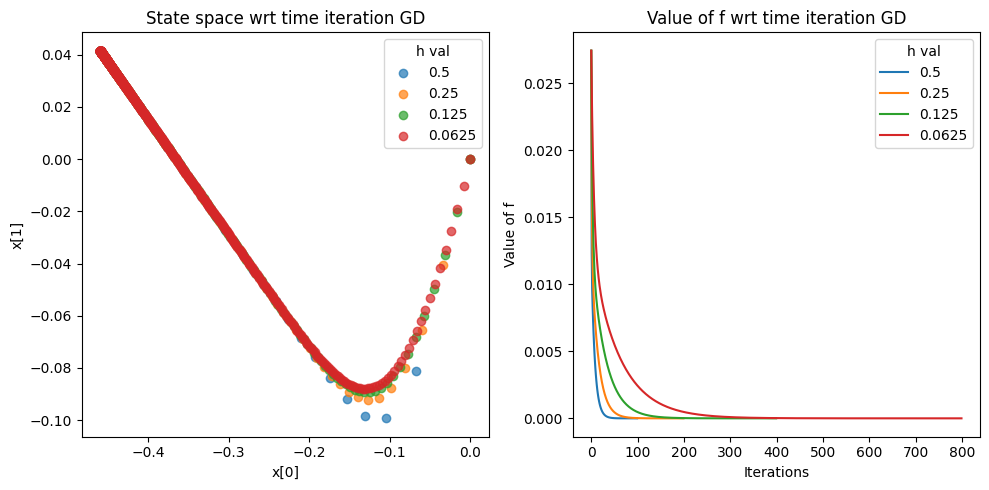

In [109]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
for i in range(len(h)):
    x_gd,f_gd = gd(grad_f,f,h[i],K[i],M,y,x_0)
    # x plots
    ax[0].scatter(x_gd[:,0],x_gd[:,1],label=str(h[i]),alpha=0.7)
    ax[0].set_title("State space wrt time iteration GD")
    ax[0].set_xlabel("x[0]")
    ax[0].set_ylabel("x[1]")
    ax[0].legend(title="h val")
    # f plots
    ax[1].plot(f_gd,label=str(h[i]))
    ax[1].set_title("Value of f wrt time iteration GD")
    ax[1].set_xlabel("Iterations")
    ax[1].set_ylabel("Value of f")
    ax[1].legend(title="h val")
plt.tight_layout()
plt.show()